# Implements gradient descent on a dataset to find the line of best fit that predicts relation between two variables

Dependencies :

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd


## Dataset
For this excercise, <a href="https://www.kaggle.com/andonians/random-linear-regression/data">Linear Regression Dataset</a> has been chosen.

The file 'train.csv' contains 700 data pairs (x,y). The x-values are numbers between 0 and 100.
Also the 'test.csv' is present to coduct test of model.  
But, let's leave the testing of model for some other time.


In [2]:
dataset = pd.read_csv('train.csv')

Here is a sample of how our data looks like.

In [3]:
dataset.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


This data has some outliers, negative values and NaN entries which needs to be cleaned.

In [4]:
#To remove NaN entries
dataset=dataset.dropna()

#To remove duplicate entries
dataset=dataset.drop_duplicates()

#To remove negative values
dataset=dataset[dataset.y>=0 ]
dataset=dataset[dataset.x>=0]

#To remove outliers the proper way is to compute Inter-quartile range but this particular dataset 
#does not contain any outliers, so we can skip this step.

**n** is the number of training examples.  


In [5]:
data = dataset.as_matrix()
n = data.shape[0]

Now let's visualize our data graphically.

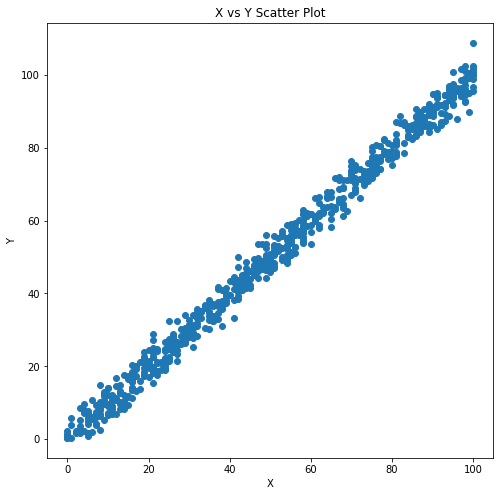

In [6]:

plt.figure(figsize = (8,8))
plt.title('X vs Y Scatter Plot')
plt.xlabel('X')
plt.ylabel('Y')
plt.scatter(data[:,0], data[:,1])
plt.show()

**SSE - Sum of Squared Error**  
Now we will write a function to calculate SSE.
This function will return Error, which will be used to measure the quality of the fitting line.
However it is not involved in the optimization process done by gradient descent.  

It will take three arguments **m**, **b** and **data**.  
m is the slope of line and b will be y-intercept.
data is the dataset used to train the model.

In [7]:
def SSE(m,b,data):
    totalError = 0.0
    for i in range(n):
        #The current output is y
        y=data[i][1]
        
        #The current input is x
        x=data[i][0]
        
        #Predicted output with our current fitting line
        #y=mx+b
        currentOutput = m*x+ b
        
        #Compute squared error
        currentSquaredError = (y-currentOutput)**2
        
        #Adding it to the Total Error
        totalError += currentSquaredError

    sse = totalError/n

    return totalError

Let's see SSE function in action.  

Consider line  
y = 2x + 1

In [8]:
m=2
b=1

sse = SSE(m,b,data)
print('For the fitting line y = %dx + %d\nSSE : %.6f' %(m,b,sse))

For the fitting line y = 2x + 1
SSE : 2413921.096132


## Gradient Descent
Now let's make a function to do repetitive gradient descent to find optimal values of **m** and **b**.

In [9]:
def gradient_descent(m_initial,b_initial,data,steps=5000):
    print('Initial line y = %.6fx + %.6f and Error = %.6f'%(m_initial,b_initial,SSE(m_initial,b_initial,data)))
    m = m_initial
    b = b_initial
    freq=steps//10
    
    for i in range(steps): #The number of steps gradient descent will take
        
        if((i) % freq == 0): #Printing parameters at every 100th step.
            print('At step %d Line: y = %.6fx + %.6f and Error: %.6f'%(i+1,m,b,SSE(m,b,data)))
        
        m_grad=0
        b_grad=0
        for current_row in range(n):
            
            #Getting data from current row of data
            x = data[current_row,0]
            y = data[current_row,1]
            
            #Partial derivative with respect to m
            dm = ((2/n) * x * ((m*x + b)-y))
            
            #Parial derivative with respect to b
            db=((2/n) * ((m*x + b)-y))
            
            #Update gradient
            m_grad = m_grad + dm
            b_grad = b_grad + db
        
        #Setting the new updated 'm' and 'b'
        m=m-0.0001*m_grad
        b=b-0.0003*b_grad
        
        """
        Here 0.0001 and 0.0003 are the learning rates of gradient descent 
        Their values are chosen after some trial and error to minimize
        the number of steps taken by gradient descent to reach optimal 
        value for parameters and at the same time prevent overshooting.
        """
    print('Best fitting line: y = %.6fx + %.6f Error : %.6f'%(m,b,SSE(m,b,data)))           
    return m,b

## Training
Now we will do gradient descent to find the optimal values for m and b.  
  
Consider the line y = 0.5x + 2 as our initial fitting line.  
Here m = 0.5 and b = 2.  
Initially the graph will look like.

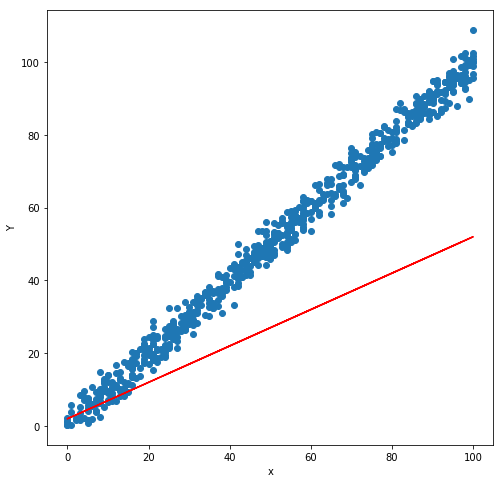

In [10]:
m = 0.5
b = 2
plt.figure(figsize= (8, 8))
plt.scatter(data[:,0], data[:,1])
plt.xlabel("x")
plt.ylabel('Y')
plt.plot(data[:,0], m*data[:,0] + b,color="red")
plt.show()

Applying **Gradient Descent**

In [11]:
m,b=gradient_descent(m,b,data)

Initial line y = 0.500000x + 2.000000 and Error = 519573.363648
At step 1 Line: y = 0.500000x + 2.000000 and Error: 519573.363648
At step 501 Line: y = 0.970848x + 1.884892 and Error: 5908.518559
At step 1001 Line: y = 0.972745x + 1.758234 and Error: 5834.648398
At step 1501 Line: y = 0.974509x + 1.640428 and Error: 5770.741659
At step 2001 Line: y = 0.976150x + 1.530854 and Error: 5715.454501
At step 2501 Line: y = 0.977677x + 1.428937 and Error: 5667.624336
At step 3001 Line: y = 0.979097x + 1.334142 and Error: 5626.245383
At step 3501 Line: y = 0.980417x + 1.245971 and Error: 5590.447520
At step 4001 Line: y = 0.981645x + 1.163962 and Error: 5559.477983
At step 4501 Line: y = 0.982788x + 1.087683 and Error: 5532.685539
Best fitting line: y = 0.983851x + 1.016735 Error : 5509.506793


Let's see how our best fitting line looks like.

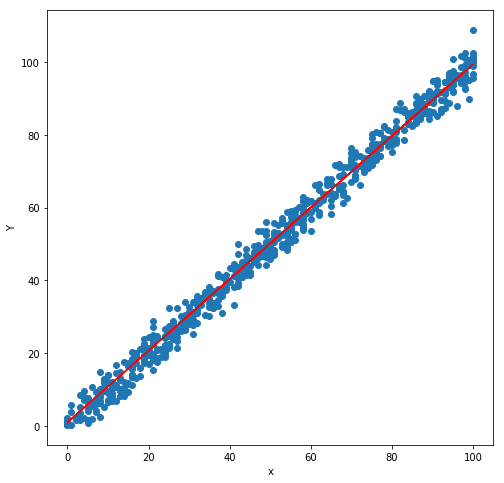

In [12]:
plt.figure(figsize= (8, 8))
plt.scatter(data[:,0], data[:,1])
plt.xlabel('x')
plt.ylabel('Y')
plt.plot(data[:,0], m*data[:,0] + b,color="red",)
plt.show()

Above plot indicates that the line fits the data very well.  
  
  
# EON
(End of Notebook)  
Sagar Gupta - Originally uploaded to <a href="https://github.com/sagar-june97p/machine-learning">Github</a>